In [1]:
from packageDsrpML1.dataset import load_csv
from packageDsrpML1.modeling.train import MLProc, metricas
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns

2025-06-21 01:20:00.154 | INFO     | packageDsrpML1.config:<module>:7 - La ruta del proyecto es: /home/usercursoML/DsrpTrabajoFinalML1/dsrptrabajofinal_ml1


# Carga del DataSet

In [2]:
data = load_csv()

2025-06-21 01:20:01.727 | INFO     | packageDsrpML1.dataset:load_csv:8 - Cargando CSV desde: /home/usercursoML/DsrpTrabajoFinalML1/dsrptrabajofinal_ml1/data/fake_bills.csv
2025-06-21 01:20:01.733 | SUCCESS  | packageDsrpML1.dataset:load_csv:11 - CSV cargado correctamente con shape (1500, 7)


In [3]:
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


# Entrenamiento de Modelos

In [5]:
rlog = MLProc("Regresion Logistica", LogisticRegression(), data)

In [6]:
rlog.train()

************************
Vistazo data depurada:
************************
<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   int64  
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 91.4 KB
None



1.Separando datos de train y test...
2.Entrenando model Regresion Logistica
3.Entrenamiento Finalizado....


In [7]:
rlog.predict()

*********************************************************************
Mostrando Metricas pre-establecidas del modelo MLProc
*********************************************************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.99      0.99      0.99       198

    accuracy                           0.99       293
   macro avg       0.99      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293



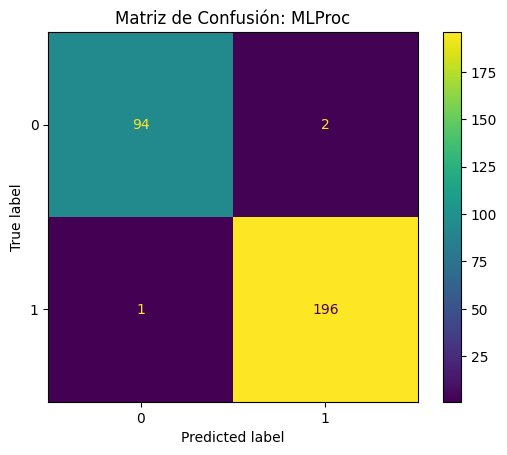

In [8]:
metricas(rlog.predictions, rlog.y_test, rlog)

<Axes: xlabel='pc1', ylabel='pc2'>

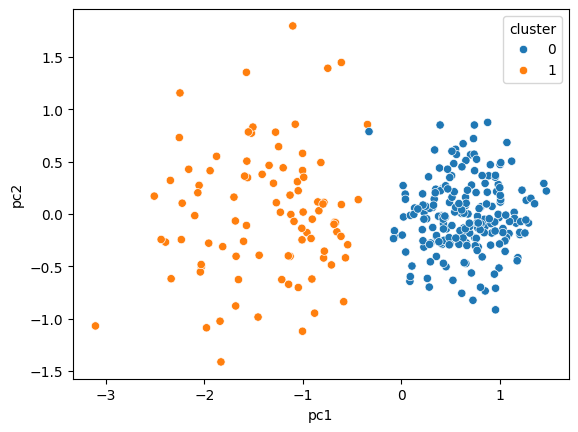

In [9]:
pca = PCA(n_components=2)
pca_components_train = pca.fit_transform(rlog.x_train)

k_means = KMeans(n_clusters=2)
k_means.fit(pca_components_train)

pca_components_test = pca.transform(rlog.x_test)
cluster_labels = k_means.predict(pca_components_test)

pca_components = pd.DataFrame(pca_components_test, columns=["pc1", "pc2"])
pca_components["cluster"] = cluster_labels

sns.scatterplot(x="pc1", y="pc2", hue="cluster", data=pca_components)

*********************************************************************
Mostrando Metricas pre-establecidas del modelo KMeans
*********************************************************************
              precision    recall  f1-score   support

           0       0.04      0.02      0.03       200
           1       0.01      0.01      0.01        93

    accuracy                           0.02       293
   macro avg       0.02      0.02      0.02       293
weighted avg       0.03      0.02      0.02       293



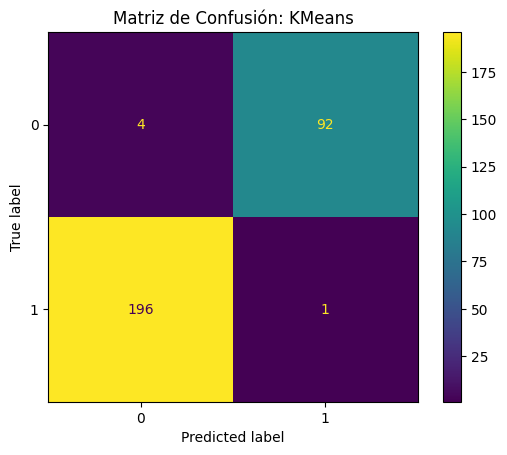

In [10]:
metricas(cluster_labels, rlog.y_test, k_means)